# Taller Robot Delta

**Facultad de Ingeniería Mecánica - Universidad Pontificia Bolivariana - Medellín - Colombia**

## Objetivo
- programar el robot delta de la UPB para realizar la trayectoria indicada sobre el plano de trabajo especificado, representando una actividad de mecanizado CNC.

## Dinámica del ejercicio

Cada estudiante recibirá una trayectoria específica con las dimensiones de una pieza a fabricar por corte CNC. Deberá generar los archivos necesarios para que el robot Delta de la UPB haga los movimientos necesarios para cortar la pieza correctamente. Esto implica que el robot debe:
- iniciar el movimiento desde la posición HOME,
- desplazarse a un punto cualquiera de la pieza para iniciar el corte en el plano de trabajo $Z = -600$ mm,
- si debe posicionarse en otra parte de la pieza, por ejemplo para hacer ranuras, debe desplazarse primero a un plano seguro, de manera que no la corte en lugares prohibidos. Dicho plano seguro está ubicado en $Z = -580$ mm


## Entregables
- Archivo binario "trayectoria" generado por el módulo "pickle" de Python. En los ejemplos realizados en clase se muestra cómo generar este archivo:

```python
import pickle
with open("trayectoria", "wb") as f:
    pickle.dump([[txv],[tyv],[tzv]], f)
```

- Archivo "angulos.csv" (valores separados por comas) con los ángulos necesarios para ejecutar la trayectoria completa. En los ejemplos realizados en clase se muestra cómo generar este archivo:

```python
    np.savetxt("angulos.csv", datos,fmt='%.3f', delimiter=",")
```

- (opcional) cuaderno con la generación de trayectoria

Los archivos que deben entregar suelen estar en la carpeta donde tengan los cuadernos de trayectoria y solución al análisis cinemático inverso:

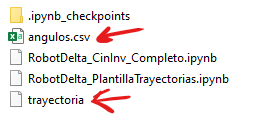

Cualquier error de lectura en estos archivos anula el correspondiente item en la rúbrica, ¡revise con cuidado los archivos antes de enviarlos!

## Restricciones

- Los ángulos generados en el archivo "angulos.csv" **DEBEN ESTAR EN DENTRO DEL RANGO DE MOVIMIENTO [-85°, -20°], SI SE SALE DE ESTE RANGO EL PROGRAMA NO SE PODRÁ EJECUTAR**
- Debe generar posiciones angulares para los tres motores $\theta_1,\theta_2,\theta_3$. Si falta algún ángulo, el programa no se podrá ejecutar.
- **Distancia mínima entre puntos**: la distancia mínima entre puntos debe ser de **5 mm**. Esto se puede calcular dividiendo el desplazamiento neto del movimiento por la distancia mínima, i.e., 5. En las plantillas recomendadas podrá encontrar funciones que implementan este cálculo.
    - Si no tiene claro cómo determinar esto, puede suponer un número de posiciones por tanteo, verificando que la distancia entre puntos no supere los 5 mm.

## Recomentaciones

La principal recomendación es que parta de las plantillas que se muestran a continuación:

1. Plantilla de trayectorias: https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_PlantillaTrayectorias.ipynb

2. Cinemática inversa para un solo brazo (COMPLETAR): https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_CinInv_Completo.ipynb

Para descargar las plantillas, clic derecho en el siguiente botón:

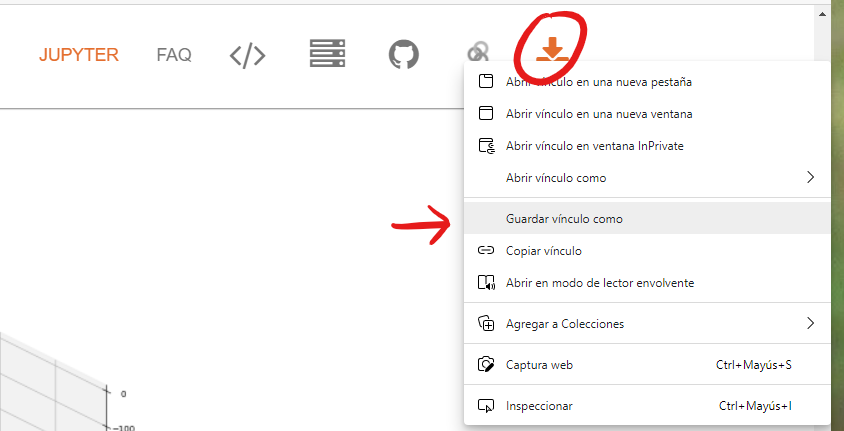

### Ejemplo

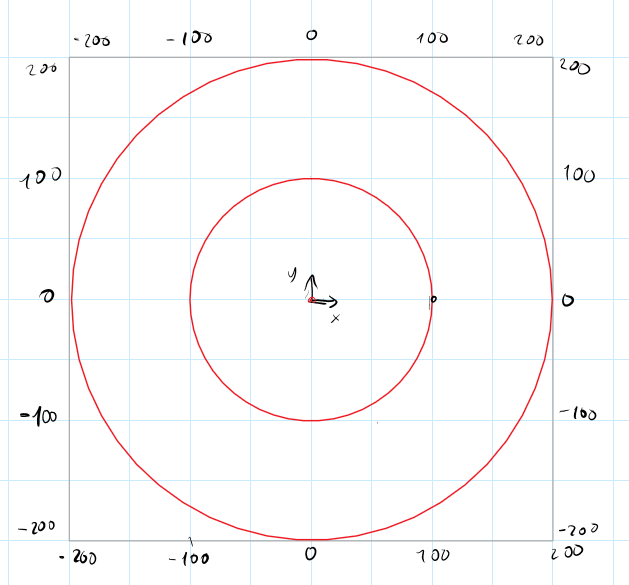

Aquí se muestra un disco de 200 mm de radio con un agujero de 100 mm de radio en el centro.

A continuación se muestra una posible trayectoria que puede seguir el robot para cortar esta pieza:

![VistaISO](EjemploArandela_ISO.gif "Vista ISO")

*Abrir aquí si no se visualiza bien: https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/EjemploArandela_ISO.gif*

El robot inicia en la posición HOME. Al finalizar los cortes regresa a este punto.

En esta pieza se tienen dos líneas independientes, lo cual requiere un desplazamiento de la herramienta sobre un plano seguro ubicado en $Z = -580 mm$. Observe con atención que la base móvil del robot se ubica en el plano seguro una vez termina de hacer el corte de la circunferencia mayor, para poder desplazarse hacia un punto cualquiera de la circunferencia menor:

![VistaFront](EjemploArandela_Front.gif "Vista Frontal")

*Abrir aquí si no se visualiza bien: https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/EjemploArandela_ISO.gif*

## Trayectorias a asignar

A continuación se generará una lista aleatoria con base en los estudiantes inscritos.

**Busque su nombre usando el cuadro de búsqueda de su navegador (Ctrl+F)**

In [5]:
%reset -sf

import glob,random,pickle
from IPython.display import Image, display
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if os.path.isfile('estudiantes'):
    print ("Leyendo lista de estudiantes")
    with open("estudiantes", "rb") as f:
        randEst = pickle.load(f)
else:
    print ("Creando lista aleatoria")
    
    estudiantes=pd.read_csv('Estudiantes.csv', sep=';')
    randEst = estudiantes.values.T[0]
    matriz = []
    random.shuffle(randEst)
    print(randEst)
    with open("estudiantes", "wb") as f:
        pickle.dump(randEst, f)

Creando lista aleatoria
['BUITRAGO DELGADO, DANIEL' 'LOPEZ RESTREPO, JUAN SEBASTIÁN'
 'JIMENEZ FRANCO, JOHN JAIRO' 'SIERRA MAESTRE, JUAN D.'
 'LONDOÑO PEREZ, PEDRO' 'MESA GRANDA, JUAN FERNANDO' 'DIAZ COSME, DANIEL'
 'ZULUAGA GONZALEZ, MANUELA' 'MARIN NIETO, PABLO' 'MONTES MEJIA, SIMON'
 'MAYA GOMEZ, SAMUEL' 'GIRALDO SALAZAR, DAVID'
 'CABALLERO GONZALEZ, GENESIS YULIETH' 'ARBOLEDA TORRES, MARTIN'
 'DEL VALLE JARAMILLO, PAULINA' 'ALVAREZ ARAQUE, JUAN MANUEL'
 'GONZALEZ TORRES, JUAN J.' 'GONZALEZ HERNANDEZ, PEDRO LUIS'
 'CARMONA LOPEZ, DANIEL' 'BAENA SOTO, SANTIAGO'
 'CAICEDO OSSA, CARLOS ANDRÉS' 'LOPEZ MARULANDA, LUZ VALENTINA'
 'PALACIO ARANGO, NICOLAS' 'ROJAS CORAL, JEISON A.']


BUITRAGO DELGADO, DANIEL  -  Caso01.png


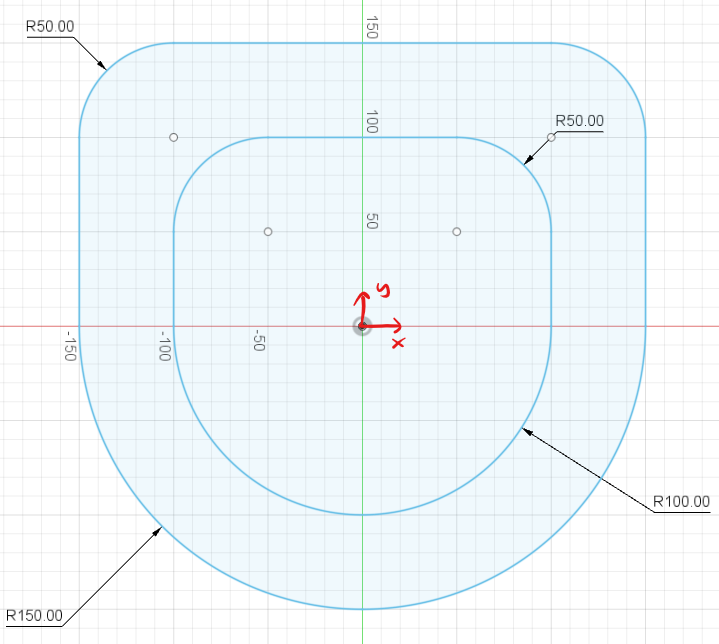

LOPEZ RESTREPO, JUAN SEBASTIÁN  -  Caso02.png


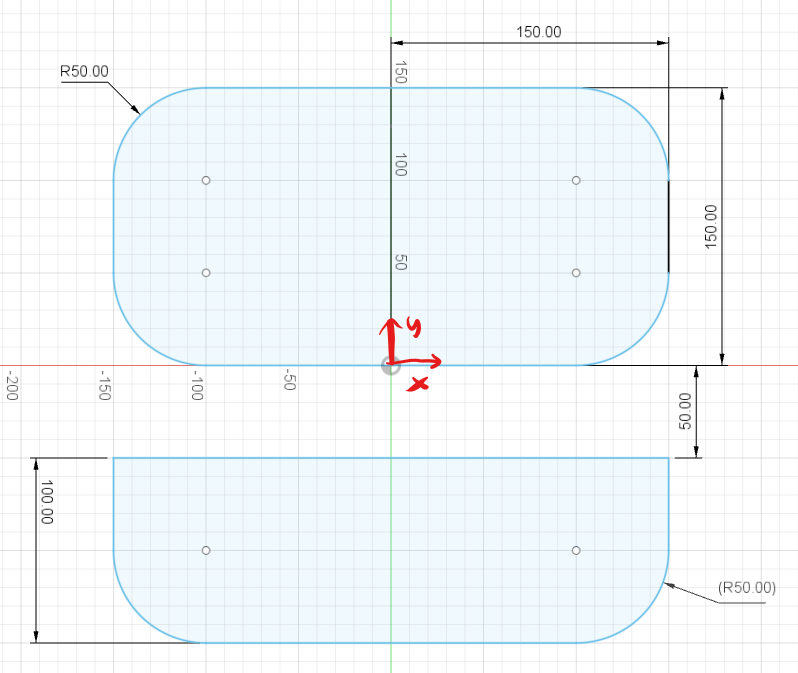

JIMENEZ FRANCO, JOHN JAIRO  -  Caso03.png


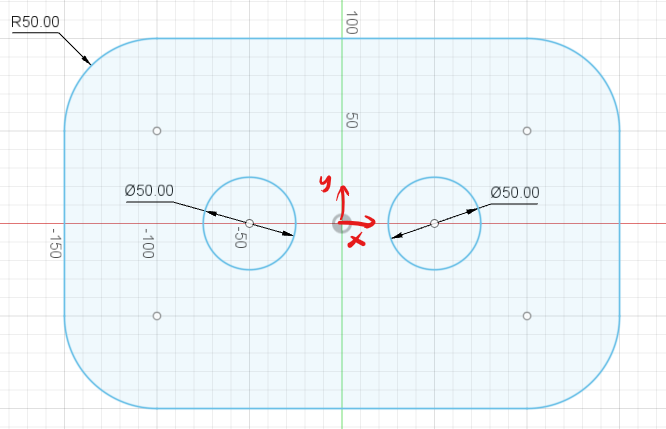

SIERRA MAESTRE, JUAN D.  -  Caso04.png


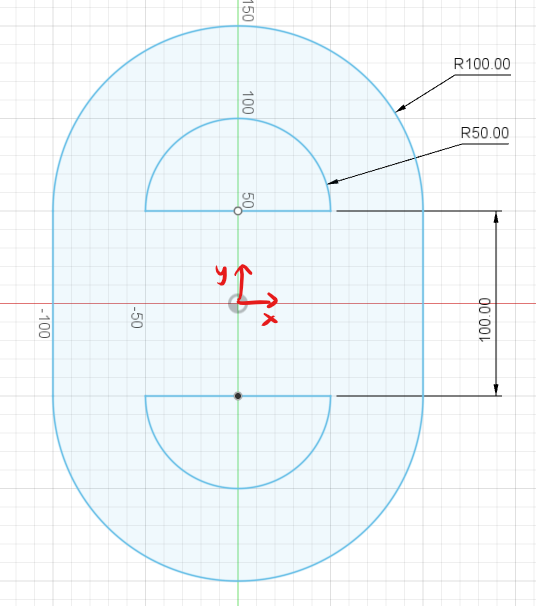

LONDOÑO PEREZ, PEDRO  -  Caso05.png


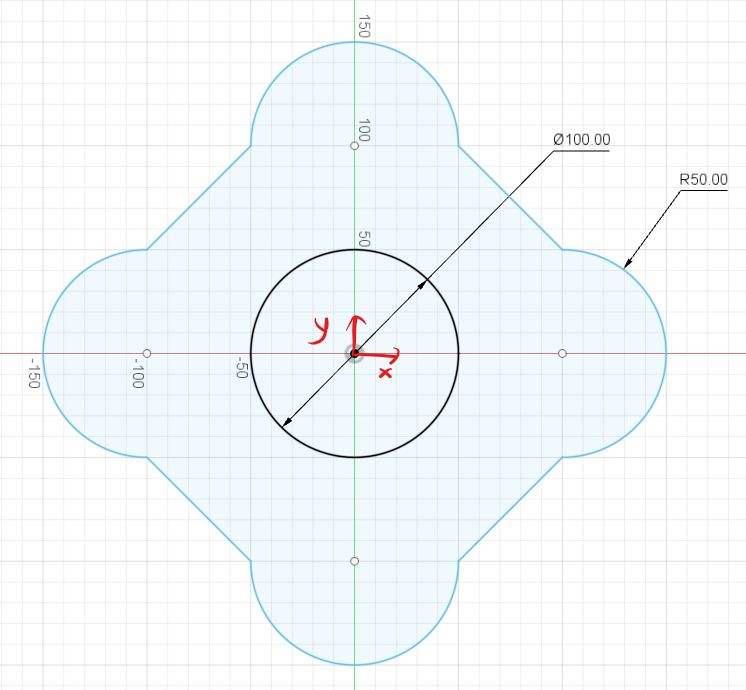

MESA GRANDA, JUAN FERNANDO  -  Caso06.png


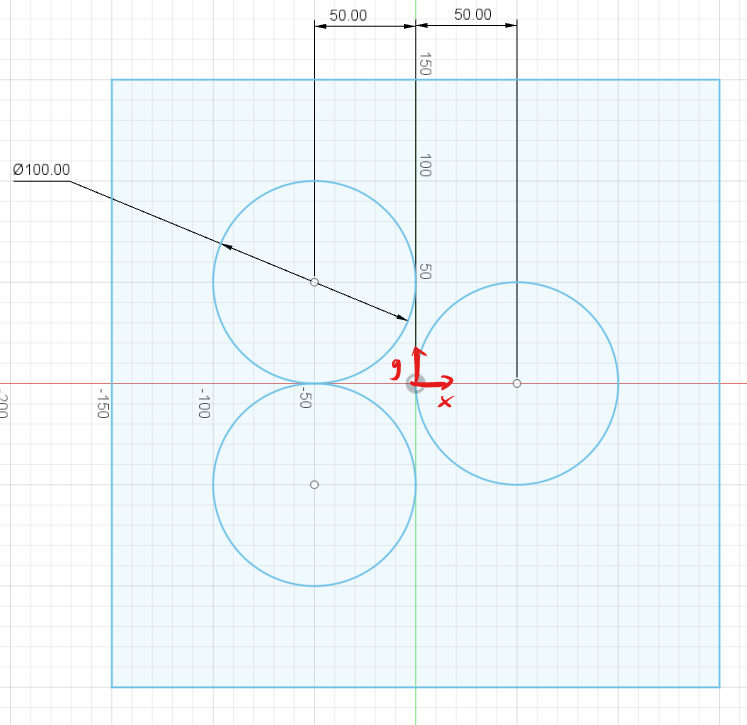

DIAZ COSME, DANIEL  -  Caso07.png


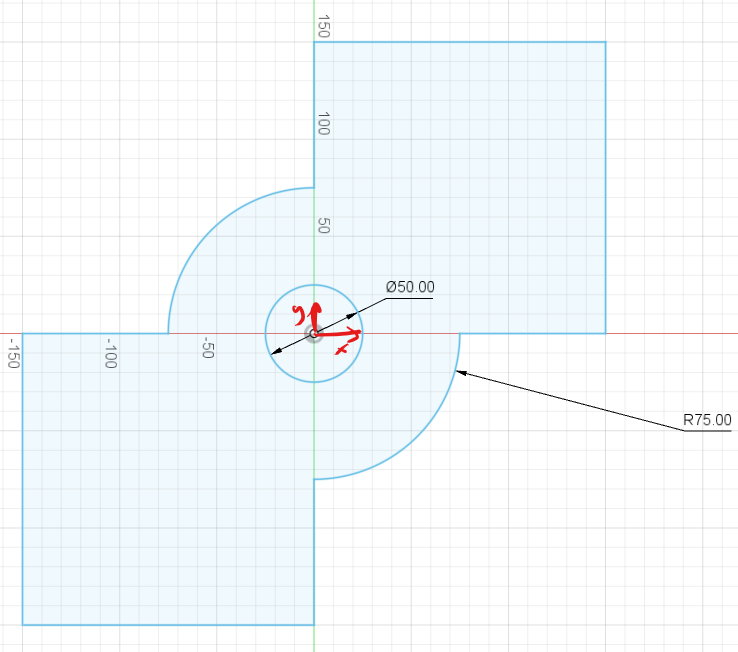

ZULUAGA GONZALEZ, MANUELA  -  Caso08.png


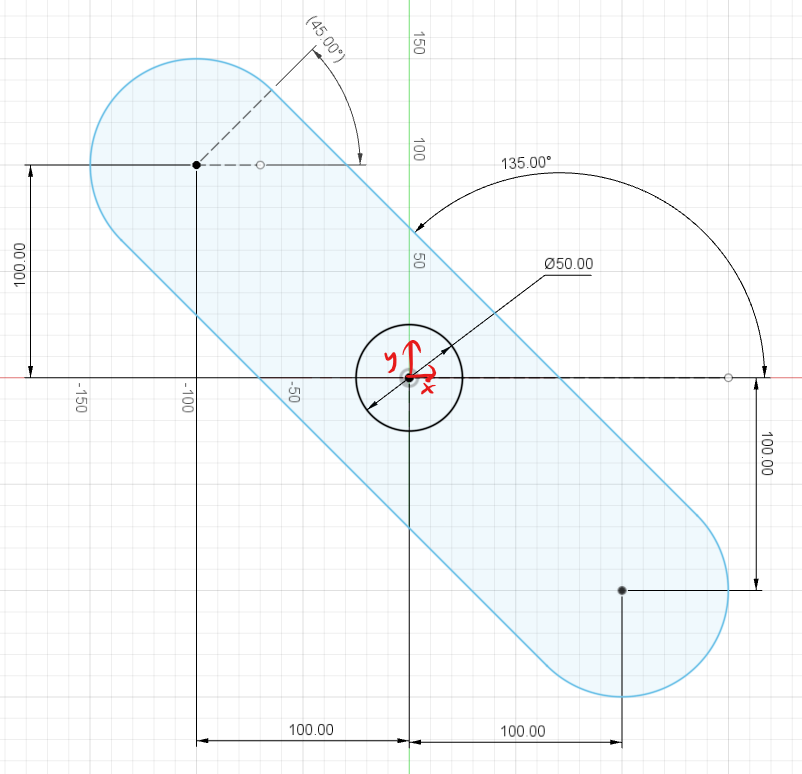

MARIN NIETO, PABLO  -  Caso09.png


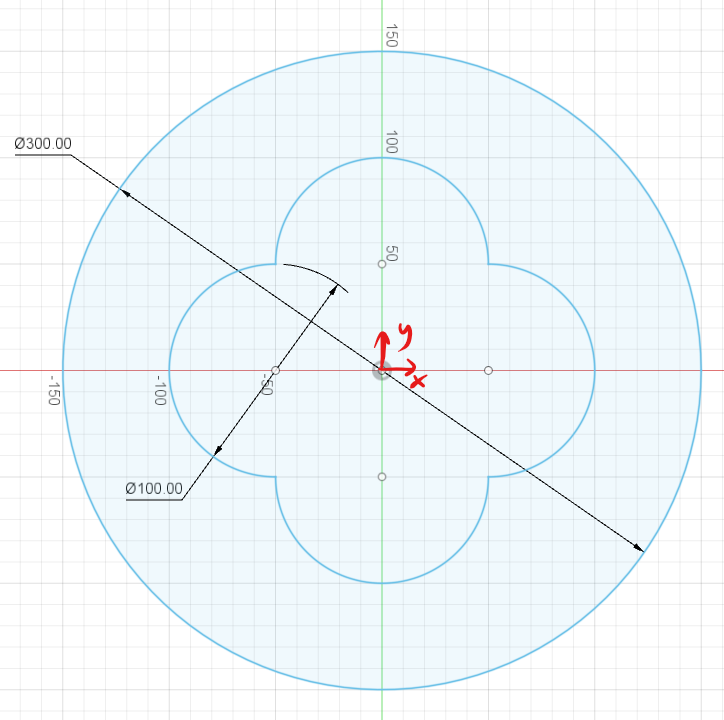

MONTES MEJIA, SIMON  -  Caso10.png


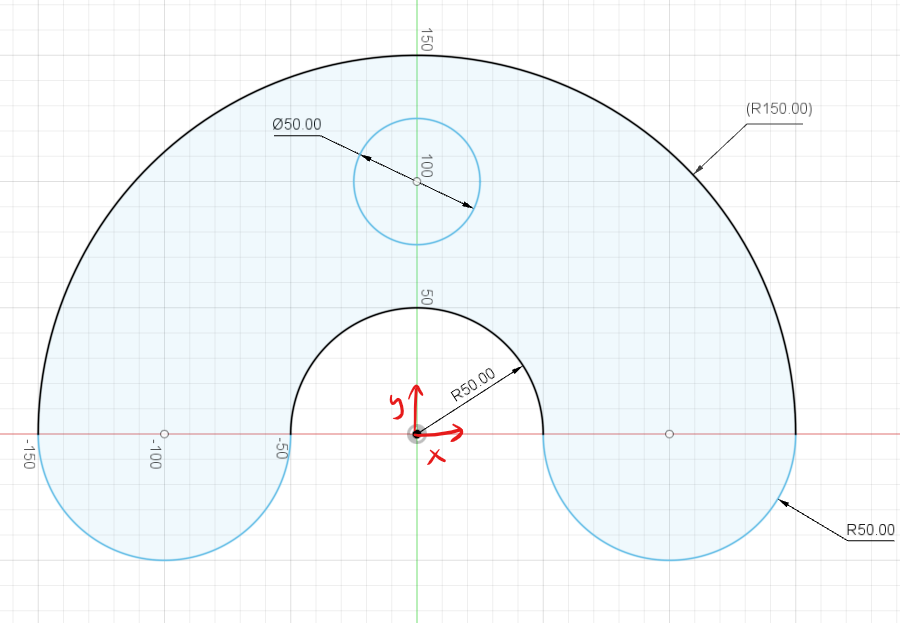

MAYA GOMEZ, SAMUEL  -  Caso11.png


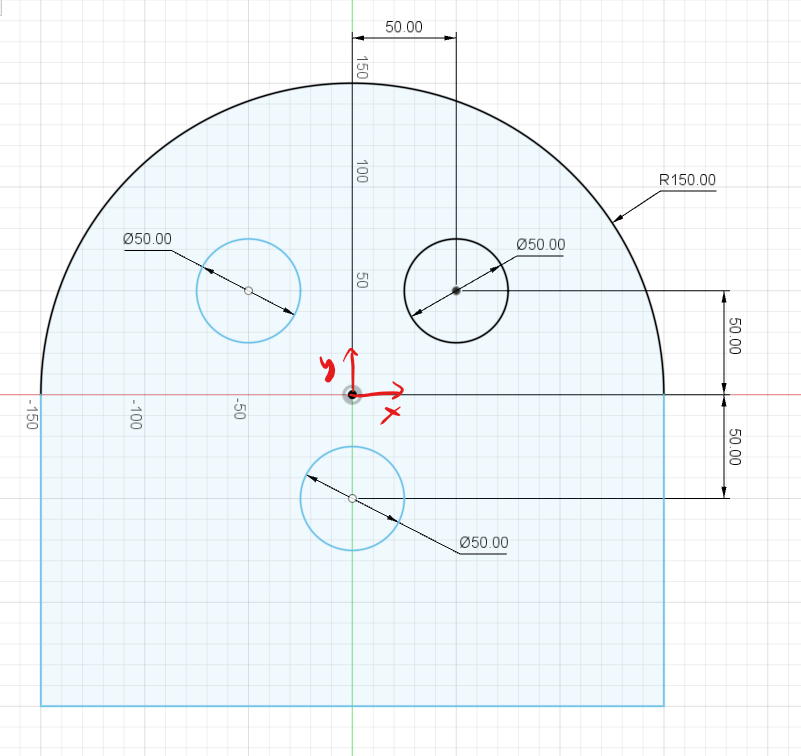

GIRALDO SALAZAR, DAVID  -  Caso12.png


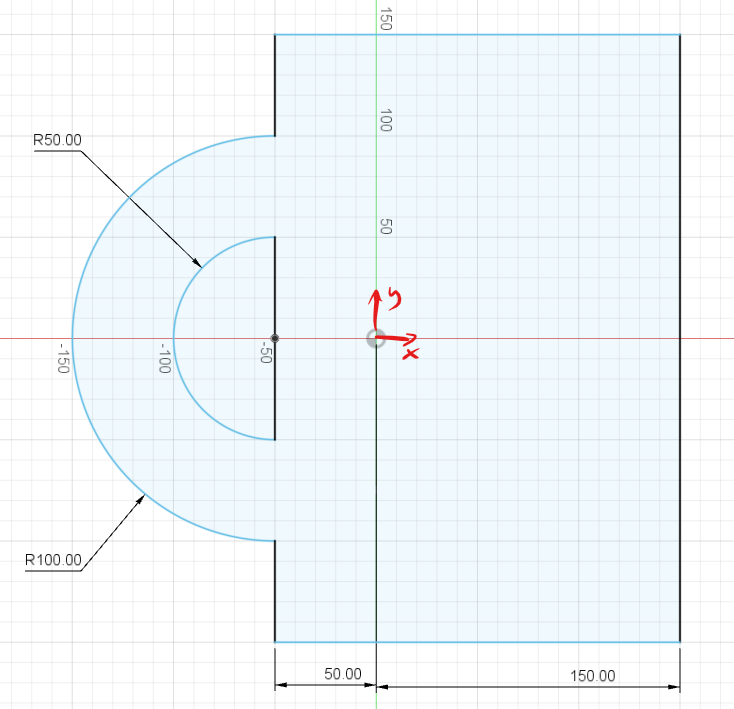

CABALLERO GONZALEZ, GENESIS YULIETH  -  Caso13.png


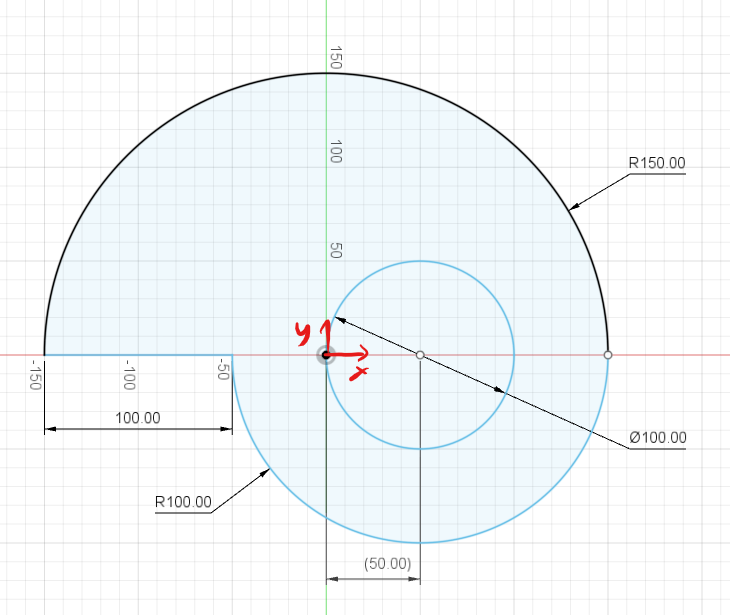

ARBOLEDA TORRES, MARTIN  -  Caso14.png


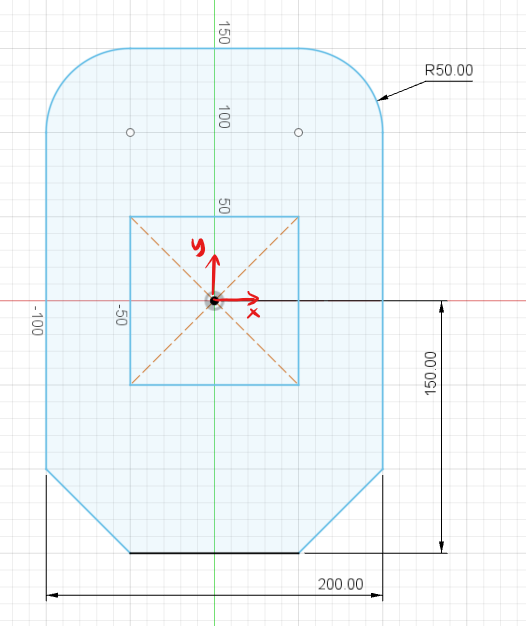

DEL VALLE JARAMILLO, PAULINA  -  Caso15.png


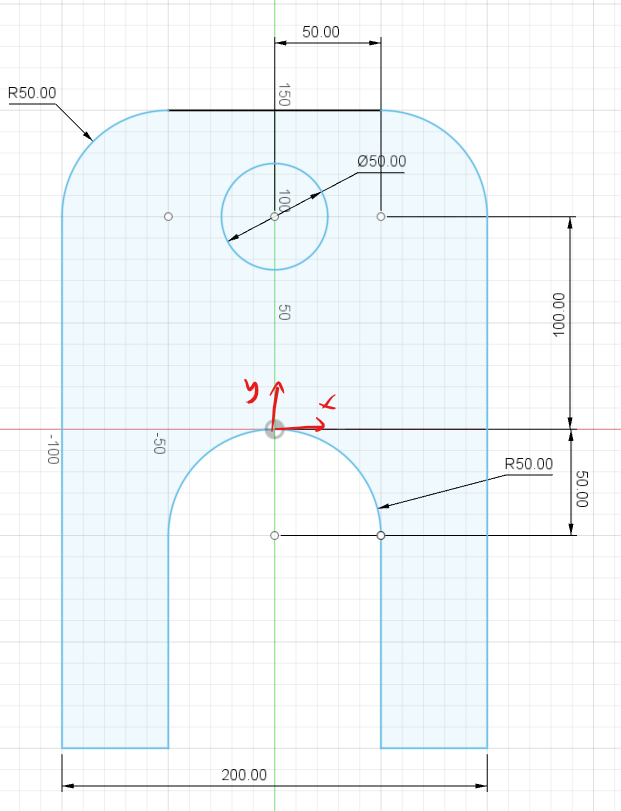

ALVAREZ ARAQUE, JUAN MANUEL  -  Caso16.png


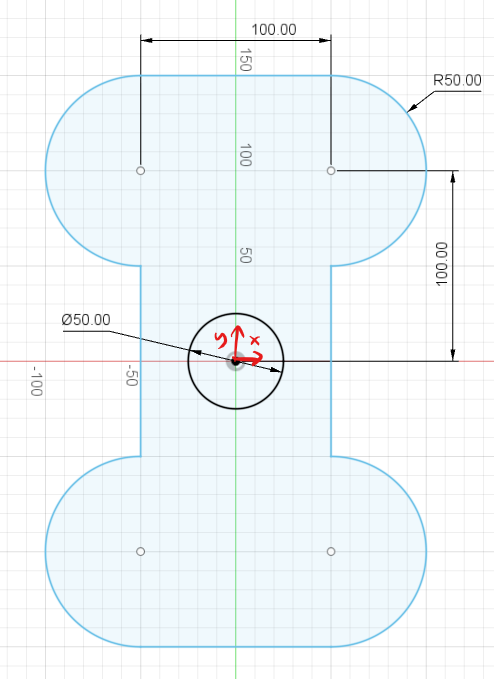

GONZALEZ TORRES, JUAN J.  -  Caso17.png


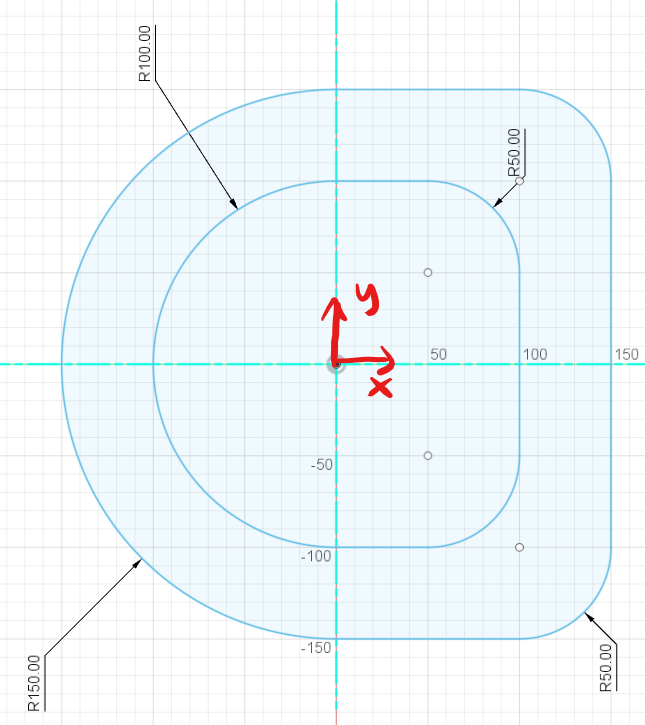

GONZALEZ HERNANDEZ, PEDRO LUIS  -  Caso18.png


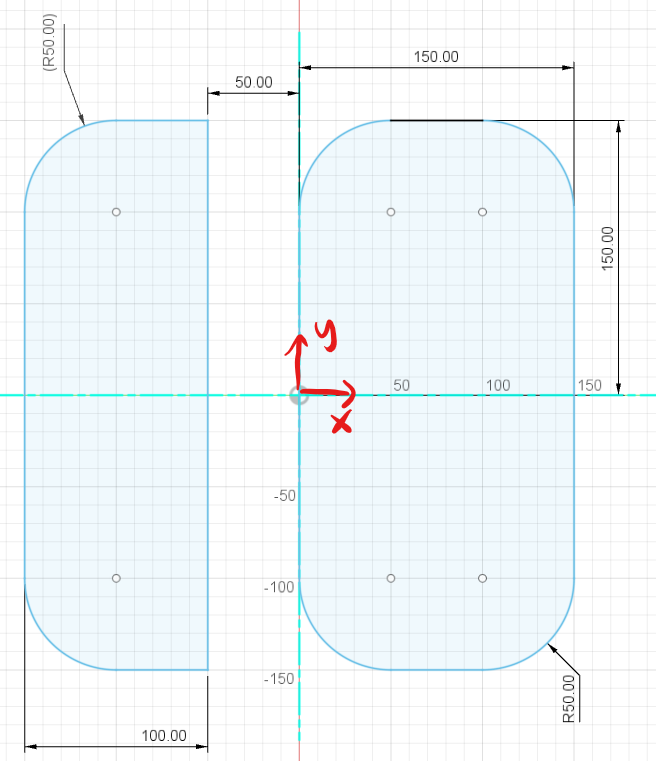

CARMONA LOPEZ, DANIEL  -  Caso19.png


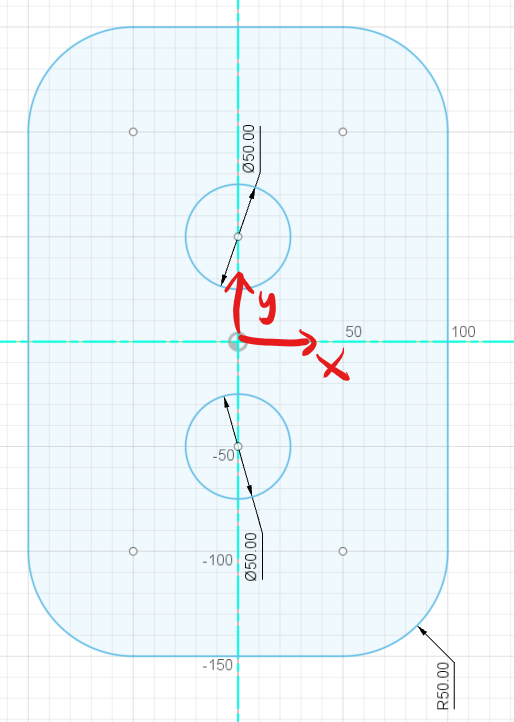

BAENA SOTO, SANTIAGO  -  Caso20.png


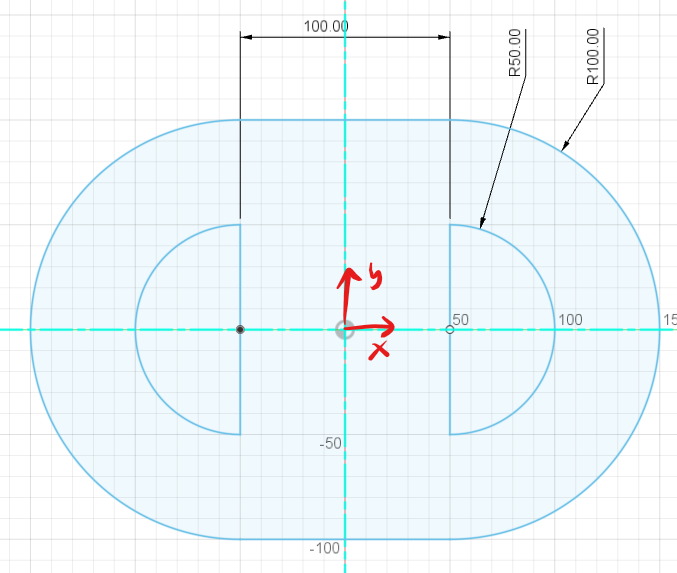

CAICEDO OSSA, CARLOS ANDRÉS  -  Caso21.png


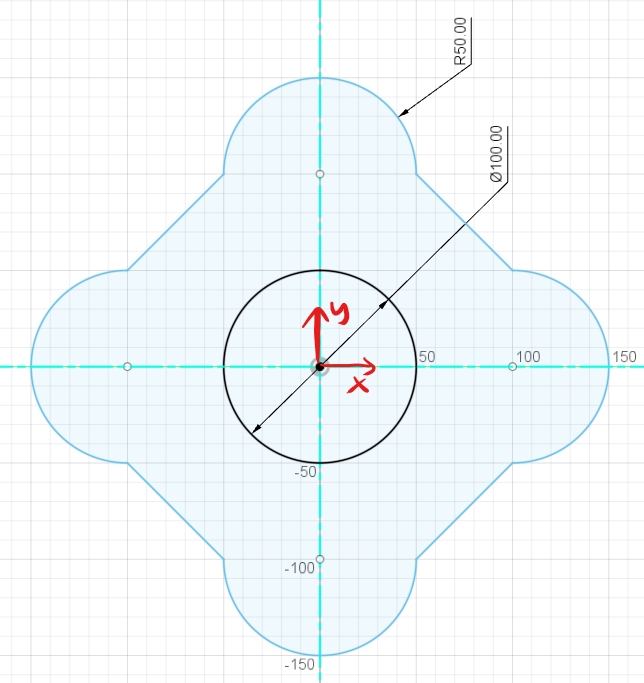

LOPEZ MARULANDA, LUZ VALENTINA  -  Caso22.png


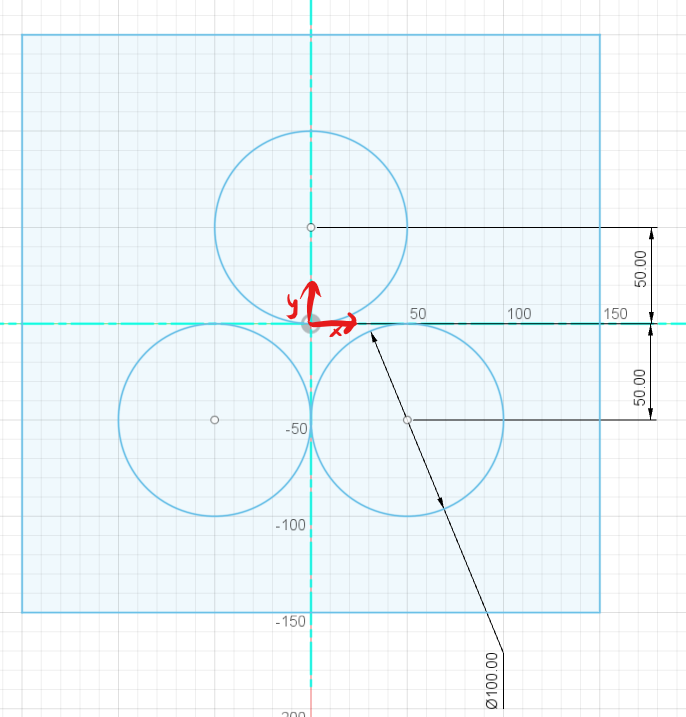

PALACIO ARANGO, NICOLAS  -  Caso23.png


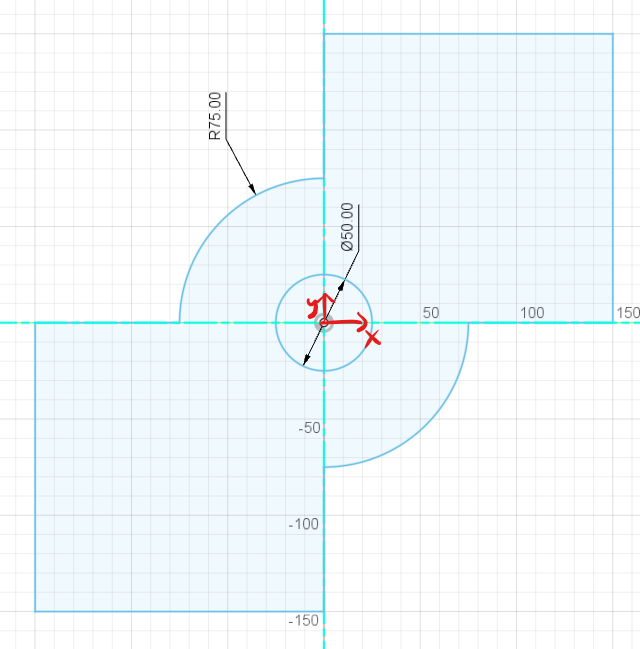

ROJAS CORAL, JEISON A.  -  Caso24.png


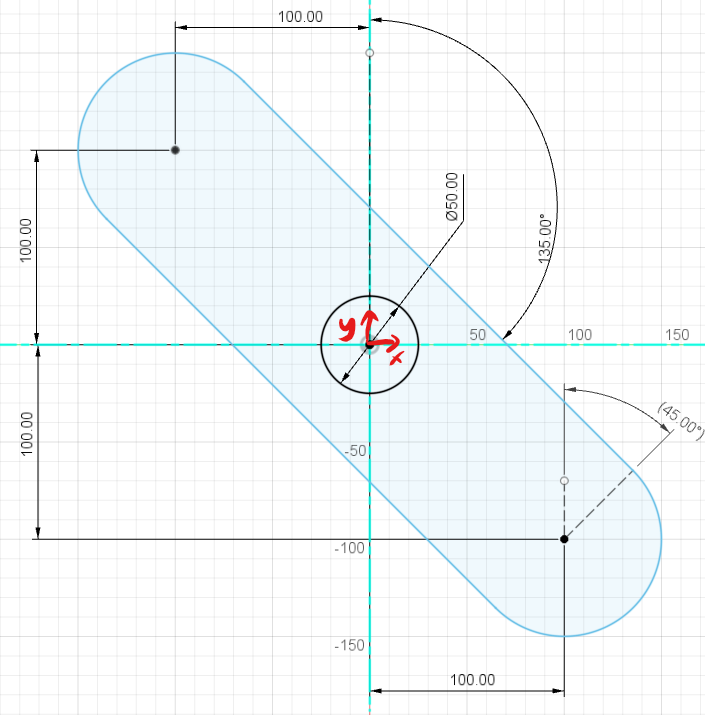

In [6]:
matriz = []
i = 0
for imageName in glob.glob('*.png'):
    if i == len(randEst):
        break
    matriz.append([randEst[i],imageName])
    print(matriz[-1][0]," - ",matriz[-1][1],)
    display(Image(filename=matriz[-1][1]))
    i = i+1

In [7]:
matrizDF = pd.DataFrame(data = matriz, columns = ["Nombre","Imagen"])
matrizDF.sort_values(by=['Nombre'])

,Nombre,Imagen
15,"ALVAREZ ARAQUE, JUAN MANUEL",Caso16.png
13,"ARBOLEDA TORRES, MARTIN",Caso14.png
19,"BAENA SOTO, SANTIAGO",Caso20.png
0,"BUITRAGO DELGADO, DANIEL",Caso01.png
12,"CABALLERO GONZALEZ, GENESIS YULIETH",Caso13.png
20,"CAICEDO OSSA, CARLOS ANDRÉS",Caso21.png
18,"CARMONA LOPEZ, DANIEL",Caso19.png
14,"DEL VALLE JARAMILLO, PAULINA",Caso15.png
6,"DIAZ COSME, DANIEL",Caso07.png
11,"GIRALDO SALAZAR, DAVID",Caso12.png


## Cuadernos útiles

Este taller requiere que el lector comprenda la teoría descrita en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Teoria.ipynb

y partimos de la solución desarrollada en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_CinInv.ipynb

En el siguente cuaderno puede revisar la teoría completa sobre trayectorias simples y compuestas:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Trayectorias.ipynb